In [101]:
# Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import re
import numpy as np
from matplotlib.ticker import StrMethodFormatter

In [102]:
#Load Data
df= pd.read_csv('contestants.csv')
df2= pd.read_csv('bachelorette-contestants.csv')

In [103]:
# Clean Data
# Seperate hometown into City and State to see most common States 
df['CITY'], df['STATE'] = df['Hometown'].str.split(',', 2).str[0:2].str

#Winner variable
winner = df[df['Together'].notnull()]
losers= df[df['Together'].isnull()]

Part 1- Data Exploration- Characterizing Bachelor Contestants

Mean age of Bachelor Contestant: 26.334719334719335
Oldest Contestant 36.0
Youngest Contestant 21.0


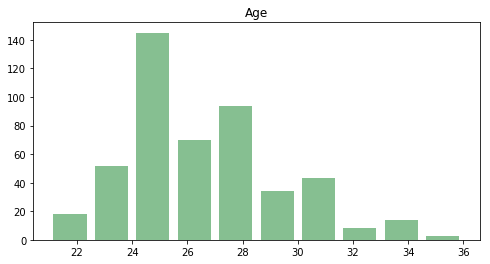

In [77]:
# Average Age of Bachelor Contestants
print("Mean age of Bachelor Contestant:", df['Age'].mean())
print("Oldest Contestant",df['Age'].max())
print("Youngest Contestant",df['Age'].min())

ax = df.hist(column='Age', bins=10, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.8)


In [78]:
df['STATE'].value_counts()[0:10]

 California        77
 Florida           36
 Texas             36
 Illinois          27
 New York          17
 New Jersey        13
 Colorado          13
 Utah              13
 Pennsylvania      12
 North Carolina    12
Name: STATE, dtype: int64

In [79]:
df['CITY'].value_counts()[0:10]

Dallas            11
Los Angeles        8
Seattle            7
Chicago            7
Salt Lake City     6
Miami              6
Tampa              6
San Diego          6
Houston            5
New York           5
Name: CITY, dtype: int64

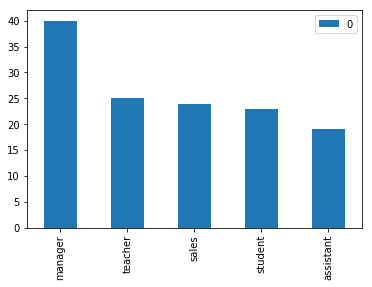

In [80]:
dfoc= df.copy()
dfoc= dfoc['Occupation'].str.lower()
dfoc= dfoc.to_frame()
dfoc= dfoc.Occupation.str.split(expand=True).stack().value_counts()[0:5]
dfoc= dfoc.to_frame()
dfoc.plot.bar()

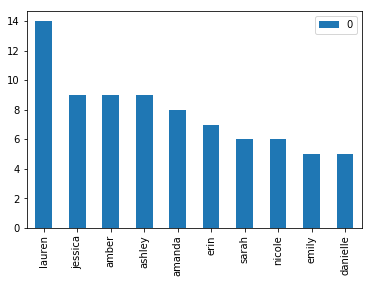

In [81]:
# Most common Names
dfname= df.copy()
dfname= dfname['Name'].str.lower()
dfname= dfname.to_frame()
dfname= dfname.Name.str.split(expand=True).stack().value_counts()[0:10]
dfname= dfname.to_frame()
dfname.plot.bar()



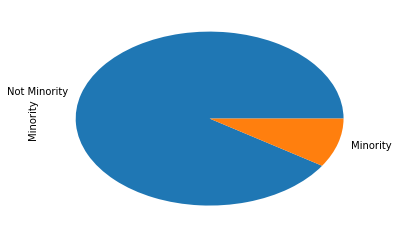

In [82]:
# 439 white contestants and only 43 minority contestants
df['Minority'].value_counts()
df3= df.copy()
df3= df.replace({0: 'Not Minority', 1: 'Minority'})
df3.Minority.value_counts().plot(kind='pie')

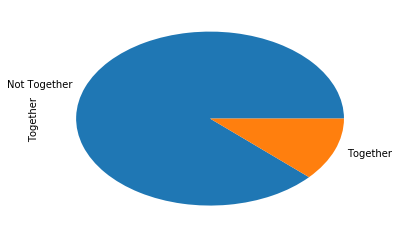

In [83]:

xl= df.replace({0: 'Not Together', 1: 'Together'})
xl['Together'].value_counts()
xl.Together.value_counts().plot(kind='pie')

In [84]:
# Looking At Age for bachelor 
#df['Age'].mean()
#df.loc[df.Elimination_Week== 'Winner', 'Age'].mean()
#df.loc[df.Elimination_Week== 'Runner-up', 'Age'].mean()
#df.loc[df.Elimination_Week== '7', 'Age'].mean()
#df.loc[df.Elimination_Week== '1', 'Age'].loc[df.Season > 10]

# looking at age for bachelorette 
#print(df2.loc[df2.ElimWeek== 'Winner', 'Age'].mean())
#print(df2.loc[df2.ElimWeek== 'Runner-up', 'Age'].mean())



In [85]:
df.loc[df.Elimination_Week== '7', 'Age'].mean()
df.loc[df.Elimination_Week== '1', 'Minority'].loc[df.Season > 10].value_counts()
df.loc[df.Elimination_Week== '2', 'Minority'].loc[df.Season > 10].value_counts()
df.loc[df.Elimination_Week== '3', 'Minority'].loc[df.Season > 10].value_counts()
df.loc[df.Elimination_Week== '4', 'Minority'].loc[df.Season > 10].value_counts()

0    34
1     2
Name: Minority, dtype: int64

In [149]:
df.loc[df.Elimination_Week== '9'].loc[df.Season >= 10].shape[0] / 11
# df.loc[df.Season > 10].shape[0]

0.9090909090909091

In [97]:
# Characterizing the First Impression Rose- who is more likely to get it


("Average Age of First Impression Rose Recipients", df.loc[df.First_Impression_Rose == 1, 'Age'].mean())
df.loc[df.First_Impression_Rose == 1, 'Hometown']
df.loc[df.First_Impression_Rose == 1].loc[df.Villain == 1]
df.loc[df.First_Impression_Rose == 1, 'Occupation']
df.loc[df.First_Impression_Rose == 1].loc[df.Elimination_Week == 'Runner-up']
df.loc[df.First_Impression_Rose == 1].loc[df.Minority == 1]

# Show first impression rose not a good indicator of who they will pick
df.loc[df.First_Impression_Rose == 1].loc[df.Elimination_Week == 'Runner-up']
df.loc[df.First_Impression_Rose == 1].loc[df.Elimination_Week == 'Winner']
df.loc[df.First_Impression_Rose == 1].loc[df.Elimination_Week == '9']
df.loc[df.First_Impression_Rose == 1].loc[df.Elimination_Week == '8']
df.loc[df.First_Impression_Rose == 1].loc[df.Elimination_Week == '7']
first_impression =df.loc[df.First_Impression_Rose == 1]
first_impression.to_csv('firstimpressionbachelor.csv')

In [111]:
# First Impression Rose Bachelorettes
first_impression_men =df2.loc[df2.FirstRose == 1]
first_impression_men.to_csv('firstimpressionbachelorette.csv')

In [121]:
impressionbach= pd.read_csv('firstimpressionbachelor.csv')
impressionbachelorette= pd.read_csv('firstimpressionbachelorette.csv')
impressionbachelorette

,Unnamed: 0,Name,Age,Occupation,Hometown,ElimWeek,Season,FirstRose
0,50,Jesse Csincsak,26.0,Professional snowboarder,"Breckenridge, Colorado",Winner,4.0,1.0
1,85,David Good,27.0,Trucking Contractor,"West Alexandria, Ohio",4,5.0,1.0
2,105,Roberto Martinez,26.0,Insurance Agent,"Tampa, Florida",Winner,6.0,1.0
3,135,Ryan Park,31.0,Solar Energy Executive,"San Luis Obispo, California",7,7.0,1.0
4,160,Doug Clerget,33.0,Single Dad/Real Estate Agent,"Tacoma, Washington",7,8.0,1.0
5,189,Ben Scott,28.0,Entrepreneur,"Lubbock, Texas",5,9.0,1.0
6,206,Nick Viall,33.0,Software Sales Executive,"Waukesha, Wisconsin",Runner-up,10.0,1.0
7,230,Shawn Booth,28.0,Personal Trainer,"Windsor Locks, Connecticut",Winner,11.0,1.0
8,256,Jordan Rodgers,27.0,Former Pro Quarterback,"Chico, California",Winner,12.0,1.0
9,282,Bryan Abasolo,NaN,NaN,NaN,Winner,13.0,1.0


In [122]:
# Part 3: Predicting a Winner- to predict a winner we will look at current season 11-23
# Bachelor Contestant Winners By Region
# Bachelor C- Average Age Gap 
df_p3= df.loc[df.Season > 10]
print("Mean age of Bachelor Contestant:",df_p3.loc[df_p3.Elimination_Week == 'Winner', 'Age'].mean())
print("Youngest Winning Bachelor Contestant:",df_p3.loc[df_p3.Elimination_Week == 'Winner', 'Age'].min())
print("Oldest Winning Bachelor Contestant:",df_p3.loc[df_p3.Elimination_Week == 'Winner', 'Age'].max())
win= df.loc[df.Elimination_Week == 'Winner']



dfoc2= win['Occupation'].str.lower().to_frame()
dfoc2= dfoc2.Occupation.str.split(expand=True).stack().value_counts()[0:5]
dfoc2
win




Mean age of Bachelor Contestant: 25.666666666666668
Youngest Winning Bachelor Contestant: 22.0
Oldest Winning Bachelor Contestant: 29.0


,Unnamed: 0,Age,Elimination_Week,Hometown,Name,Occupation,Outcome,Season,First_Impression_Rose,Villain,Minority,Together,CITY,STATE
0,0,23.0,Winner,"Chanute, Kansas",Amanda Marsh,Event Planner,NaN,1,NaN,NaN,0,0.0,Chanute,Kansas
25,0,27.0,Winner,"Gloucester, New Jersey",Helene Eksterowicz,School Psychologist,NaN,2,NaN,NaN,0,0.0,Gloucester,New Jersey
50,0,22.0,Winner,"Huntington Beach, California",Jessica Bowlin,Student,NaN,5,NaN,0.0,0,0.0,Huntington Beach,California
75,0,24.0,Winner,"Pembroke Pines, Florida",Jennifer Wilson,Teacher,NaN,9,NaN,0.0,0,0.0,Pembroke Pines,Florida
102,0,26.0,Winner,"San Francisco, California",Tessa Horst,Social Worker,NaN,10,0.0,NaN,0,0.0,San Francisco,California
152,0,22.0,Winner,"Malibu, California",Shayna Lamas[1],Actress,NaN,12,0.0,NaN,1,0.0,Malibu,California
177,0,25.0,Winner,"Dallas, Texas",Melissa Rycroft[1],Sales Representative,NaN,13,0.0,NaN,0,0.0,Dallas,Texas
202,0,23.0,Winner,"Geneva, Florida",Vienna Girardi[1][2],Marketing Representative,NaN,14,0.0,1.0,0,0.0,Geneva,Florida
227,0,25.0,Winner,"Morgantown, West Virginia",Emily Maynard[5],Children's Hospital Event Planner,NaN,15,0.0,0.0,0,0.0,Morgantown,West Virginia
257,0,28.0,Winner,"Scottsdale, Arizona",Courtney Robertson[3][4],Model,NaN,16,0.0,1.0,0,0.0,Scottsdale,Arizona


In [22]:
df.loc[df.Season > 10].loc[df.Minority==0]
win['Minority'].value_counts()

0    15
1     2
Name: Minority, dtype: int64

In [24]:

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

KeyError: 'state'

In [ ]:
df